# Import Libraries and Models

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

# View Dataset

In [6]:
df= pd.read_csv("SUV.csv")

In [9]:
df.head(8)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1


In [12]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [15]:
len(df)

400

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [18]:
df.groupby("Purchased").size()

Purchased
0    257
1    143
dtype: int64

In [21]:
cleaned_df = df.drop (columns = ['User ID'], axis = '1')
cleaned_df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [22]:
cleaned_df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# Visualisation of Data

<AxesSubplot:xlabel='Purchased', ylabel='count'>

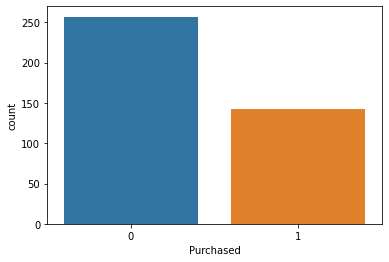

In [23]:
sns.countplot(x= "Purchased", data= cleaned_df)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

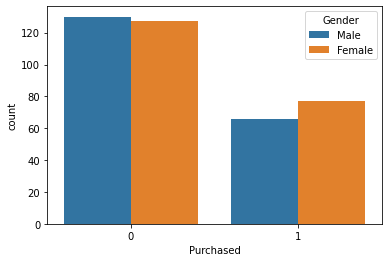

In [24]:
seaborn.countplot ( x = 'Purchased', hue = 'Gender', data = cleaned_df)

<AxesSubplot:>

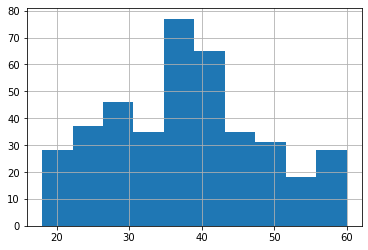

In [25]:
cleaned_df['Age'].hist(bins = 10)

In [26]:
age_category = []
for i in range (0, len  (df ['Age'])):
    if cleaned_df ['Age'][i] <= 20:
        age_category.append ('A');
    elif 20 < cleaned_df ['Age'][i] <= 30:
        age_category.append ('B');
    elif 26 < cleaned_df ['Age'][i] <= 40:
        age_category.append ('C');
    elif 30 < cleaned_df ['Age'][i] <= 50:
        age_category.append ('D');
    elif 40 < cleaned_df ['Age'][i] <= 60:
        age_category.append ('E');
    else:
        age_category.append ('F');


In [27]:
age_df = pd.DataFrame (data = age_category, columns = ['AgeCategory'])

In [28]:
age_df

,AgeCategory
0,A
1,C
2,B
3,B
4,A
...,...
395,D
396,E
397,D
398,C


In [30]:
augmented_df = pd.concat([cleaned_df, age_df], axis = 1)

In [31]:
augmented_df.head(10)

,Gender,Age,EstimatedSalary,Purchased,AgeCategory
0,Male,19,19000,0,A
1,Male,35,20000,0,C
2,Female,26,43000,0,B
3,Female,27,57000,0,B
4,Male,19,76000,0,A
5,Male,27,58000,0,B
6,Female,27,84000,0,B
7,Female,32,150000,1,C
8,Male,25,33000,0,B
9,Female,35,65000,0,C


<AxesSubplot:xlabel='Purchased', ylabel='count'>

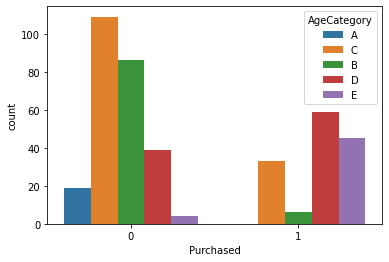

In [32]:
seaborn.countplot(x = 'Purchased', hue = 'AgeCategory', data = augmented_df)

From the visualisation above we can decifer that:
    
- People from age 20 and below don't buy SUVs
- People from age 30 and above are the ones buying SUVs
- Most people from age 50 are biggest purchasers of SUVs

<AxesSubplot:>

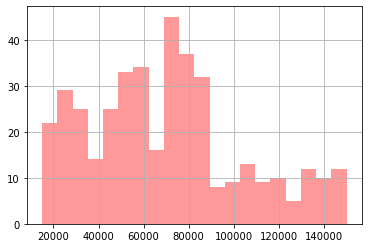

In [36]:
df['EstimatedSalary'].hist(bins = 20, color= "Red", alpha=0.4)

In [38]:
income_category = []
for i in range (0, len  (df['EstimatedSalary'])):
    if cleaned_df ['EstimatedSalary'][i] <= 19500:
        income_category.append ('Very Low');
    elif 19500 < cleaned_df ['EstimatedSalary'][i] <= 40000:
        income_category.append ('Low');
    elif 40000 < cleaned_df ['EstimatedSalary'][i] <= 60000:
        income_category.append ('Moderately Low');
    elif 60000 < cleaned_df ['EstimatedSalary'][i] <= 80000:
        income_category.append ('Medium');
    elif 80000 < cleaned_df ['EstimatedSalary'][i] <= 100000:
        income_category.append ('Moderately high');
    elif 100000 < cleaned_df ['EstimatedSalary'][i] <= 130000:
        income_category.append ('Very High');
    elif 130000 < cleaned_df ['EstimatedSalary'][i] <= 145000:
        income_category.append ('Very High');
    else:
        income_category.append ('Extremely High');

In [42]:
income_df = pd.DataFrame(data = income_category, columns = ['IncomeCategory'])

In [43]:
augmented_df2 = pd.concat([cleaned_df, income_df], axis = 1)

In [44]:
augmented_df2.head(10)

,Gender,Age,EstimatedSalary,Purchased,IncomeCategory
0,Male,19,19000,0,Very Low
1,Male,35,20000,0,Low
2,Female,26,43000,0,Moderately Low
3,Female,27,57000,0,Moderately Low
4,Male,19,76000,0,Medium
5,Male,27,58000,0,Moderately Low
6,Female,27,84000,0,Moderately high
7,Female,32,150000,1,Extremely High
8,Male,25,33000,0,Low
9,Female,35,65000,0,Medium


<AxesSubplot:xlabel='Purchased', ylabel='count'>

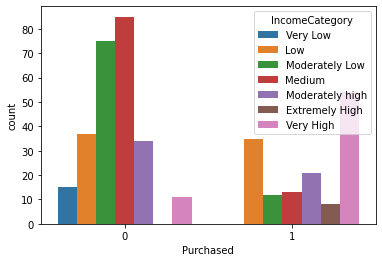

In [51]:
seaborn.countplot(x = 'Purchased', hue = 'IncomeCategory', data = augmented_df2)

From the visualisation above we can decifer that:
- People who earn less than 19500 don't buy SUVs
- People who earn more than 40000 will buy SUVs
- Most people that buy SUVs earn between 130000 to 145000

In [54]:
sex=pd.get_dummies(df["Gender"],drop_first=True)
sex.head(10)

,Male
0,1
1,1
2,0
3,0
4,1
5,1
6,0
7,0
8,1
9,0


In [57]:
BinaryAge=pd.get_dummies(augmented_df["AgeCategory"])
BinaryAge.head(10)

,A,B,C,D,E
0,1,0,0,0,0
1,0,0,1,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,1,0,0,0,0
5,0,1,0,0,0
6,0,1,0,0,0
7,0,0,1,0,0
8,0,1,0,0,0
9,0,0,1,0,0


In [58]:
BinaryIncome=pd.get_dummies(augmented_df2["IncomeCategory"])
BinaryIncome.head(10)

,Extremely High,Low,Medium,Moderately Low,Moderately high,Very High,Very Low
0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0
5,0,0,0,1,0,0,0
6,0,0,0,0,1,0,0
7,1,0,0,0,0,0,0
8,0,1,0,0,0,0,0
9,0,0,1,0,0,0,0


In [59]:
augmented_df2

,Gender,Age,EstimatedSalary,Purchased,IncomeCategory
0,Male,19,19000,0,Very Low
1,Male,35,20000,0,Low
2,Female,26,43000,0,Moderately Low
3,Female,27,57000,0,Moderately Low
4,Male,19,76000,0,Medium
...,...,...,...,...,...
395,Female,46,41000,1,Moderately Low
396,Male,51,23000,1,Low
397,Female,50,20000,1,Low
398,Male,36,33000,0,Low


In [61]:
Final_df1=pd.concat([augmented_df2, sex, BinaryAge, BinaryIncome], axis=1)
Final_df=Final_df1.drop(columns=["Age", "Gender", "EstimatedSalary", "IncomeCategory"], axis=1)
Final_df.head(10)

,Purchased,Male,A,B,C,D,E,Extremely High,Low,Medium,Moderately Low,Moderately high,Very High,Very Low
0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,1,0,0,0
4,0,1,1,0,0,0,0,0,0,1,0,0,0,0
5,0,1,0,1,0,0,0,0,0,0,1,0,0,0
6,0,0,0,1,0,0,0,0,0,0,0,1,0,0
7,1,0,0,0,1,0,0,1,0,0,0,0,0,0
8,0,1,0,1,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [68]:
Final_df.isnull().sum()

Purchased          0
Male               0
A                  0
B                  0
C                  0
D                  0
E                  0
Extremely High     0
Low                0
Medium             0
Moderately Low     0
Moderately high    0
Very High          0
Very Low           0
dtype: int64

# Data Modelling

In [64]:
X=Final_df.drop("Purchased",axis=1)
y=Final_df["Purchased"]

In [65]:
X.head(10)

,Male,A,B,C,D,E,Extremely High,Low,Medium,Moderately Low,Moderately high,Very High,Very Low
0,1,1,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,1,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,1,0,0,0
4,1,1,0,0,0,0,0,0,1,0,0,0,0
5,1,0,1,0,0,0,0,0,0,1,0,0,0
6,0,0,1,0,0,0,0,0,0,0,1,0,0
7,0,0,0,1,0,0,1,0,0,0,0,0,0
8,1,0,1,0,0,0,0,1,0,0,0,0,0
9,0,0,0,1,0,0,0,0,1,0,0,0,0


In [67]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    0
9    0
Name: Purchased, dtype: int64

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [72]:
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression()

In [73]:
LR.fit(X_train,y_train)

LogisticRegression()

In [74]:
predictions = LR.predict(X_test)
predictions

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [76]:
report= classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.89      0.90        72
           1       0.84      0.85      0.85        48

    accuracy                           0.88       120
   macro avg       0.87      0.87      0.87       120
weighted avg       0.88      0.88      0.88       120



In [77]:
CM= confusion_matrix(y_test,predictions)
print(CM)

[[64  8]
 [ 7 41]]


In [78]:
accuracy_score(y_test,predictions)

0.875